In [2]:
# Import libraries  
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
    
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score , classification_report   
from sklearn.preprocessing import QuantileTransformer  
from sklearn.linear_model import LogisticRegression   
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC  

#To turn off warning messages.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the dataset 
data = pd.read_csv("diabetes.csv")  
data.head()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
#EDA
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Replacing 0 values with Mean 
#In Glucose
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].median())  
#In BloodPressure
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].median())
#In BMI
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())  
#In SkinThickness
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())  
#In Insulin
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())  

In [8]:
#Now check data after replacing the zeros
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1


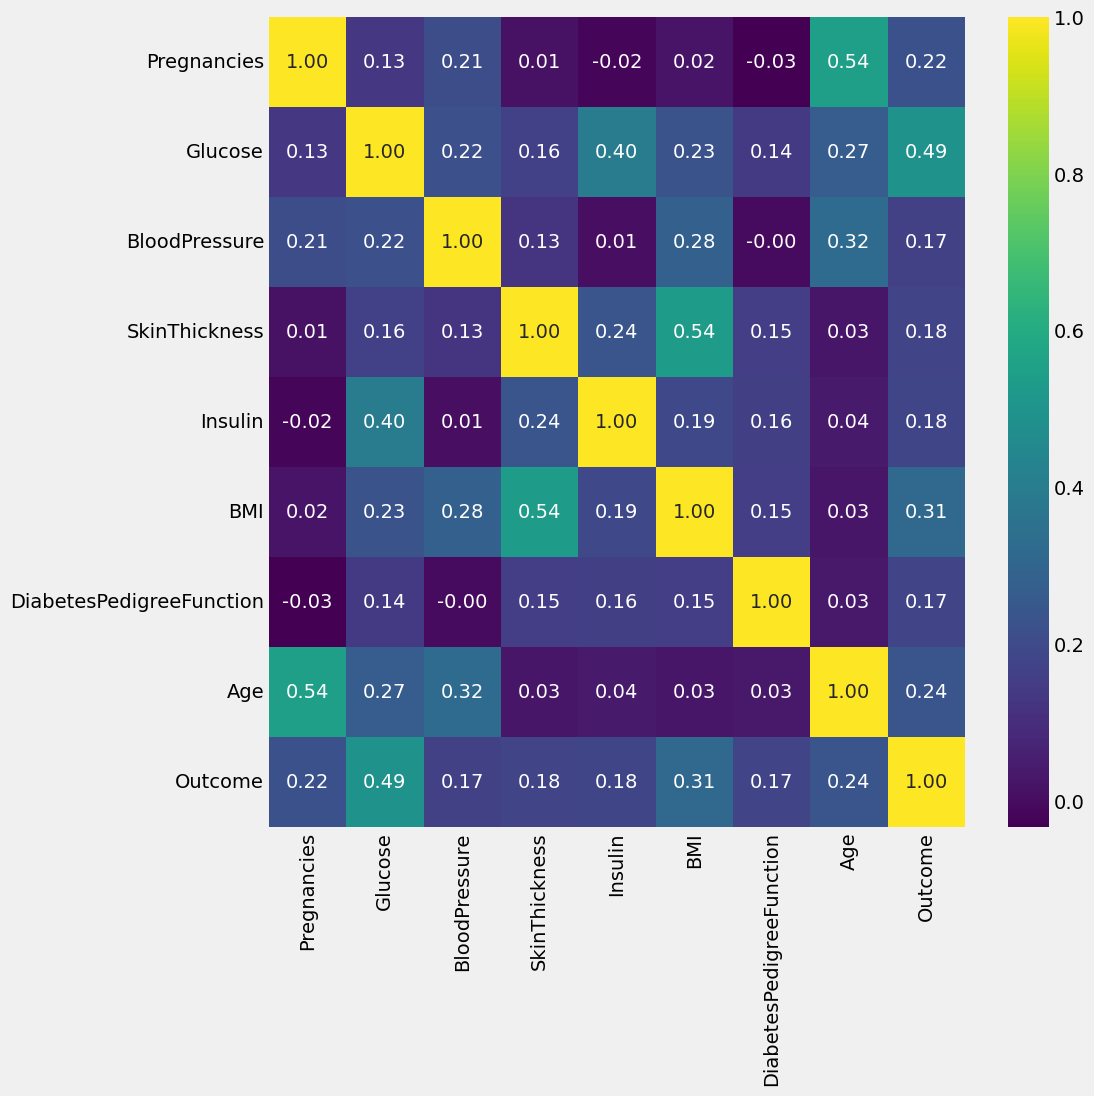

In [9]:
#Colerration check.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(),annot=True,fmt = ".2f",cmap='viridis')
plt.show()

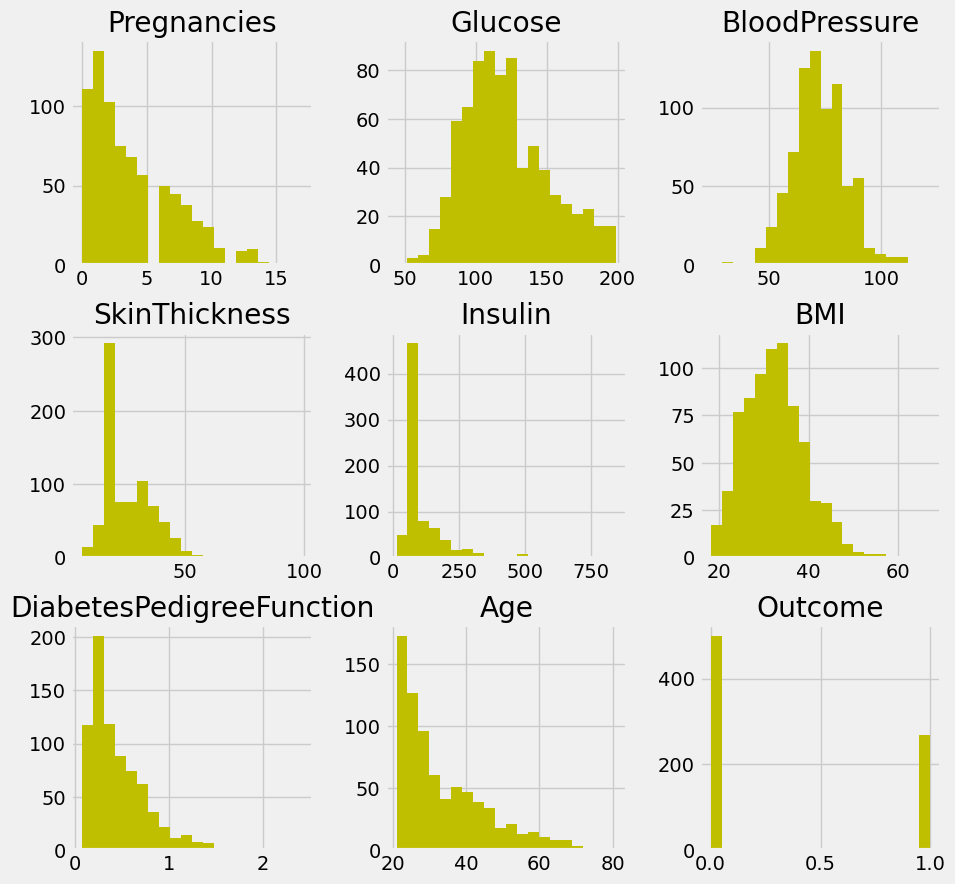

In [10]:
plt.style.use('fivethirtyeight')
data.hist(bins=20, figsize=(10, 10),color='y')
plt.show()

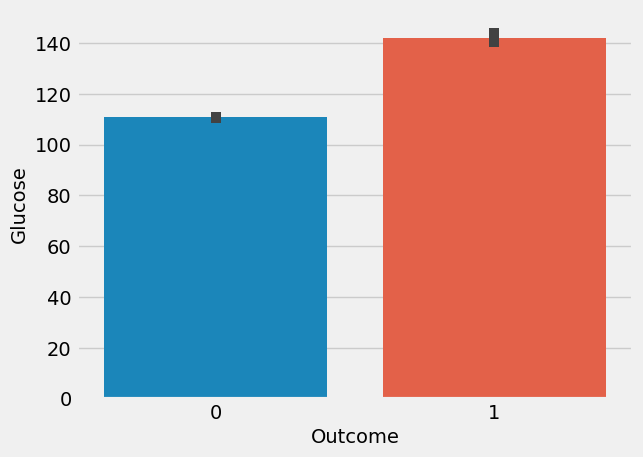

In [11]:
plt.style.use('fivethirtyeight')
sns.barplot(x='Outcome',y='Glucose',data=data)
plt.xlabel("Outcome")  
plt.ylabel("Glucose")  
plt.show()

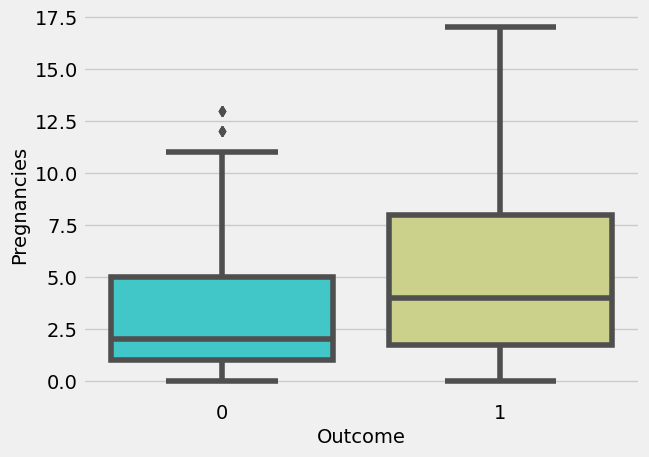

In [12]:
plt.style.use('fivethirtyeight')
sns.boxplot(x='Outcome',y='Pregnancies',data=data,palette='rainbow')
plt.xlabel("Outcome")  
plt.ylabel("Pregnancies")  
plt.show()

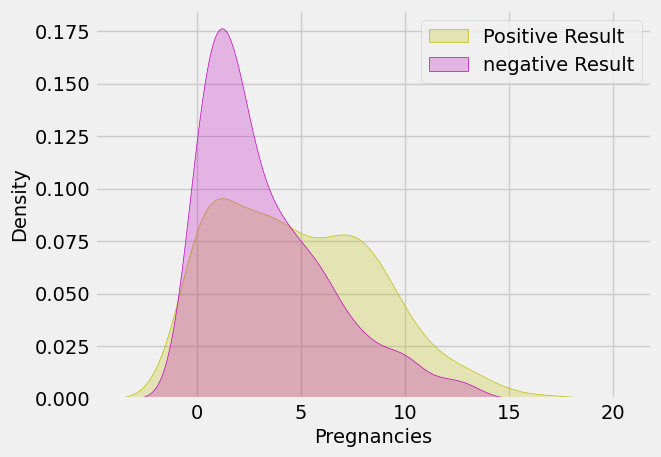

In [13]:
plt.style.use('fivethirtyeight')
sns.kdeplot(data["Pregnancies"][data["Outcome"] == 1], color = "y", shade = True,label='Positive Result')  
sns.kdeplot(data["Pregnancies"][data["Outcome"] == 0], color = "m", shade= True , label='negative Result')  
plt.xlabel("Pregnancies")  
plt.ylabel("Density")
plt.legend()
plt.show()

In [14]:
# Transforming the data into quartiles  
quartile  = QuantileTransformer()  
X = quartile.fit_transform(data)  
data = quartile.transform(X)  
data = pd.DataFrame(X)  
data.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']  

# Splitting the data  
X = data.drop(["Outcome"], axis = 1)  
y = data["Outcome"]  
  
#Splitting the data into the training and testing set  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)   

In [15]:
#Training models.
models = [
           LogisticRegression(C = 200, penalty= 'l2', solver =  'liblinear',random_state = 0)
           ,RandomForestClassifier(criterion = 'entropy' , max_depth = 5 , n_estimators = 500) 
           ,SVC(kernel = 'rbf' ,C = 1)
         ]
for i in range(3):
    models[i].fit(X_train, y_train)

In [16]:
#Predict and show the Accuracy & Confutin matrix
for i in range (3):
    y_pred = models[i].predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Confution matrix for model " f'{models[i]} : \n',cm)
    ac = accuracy_score(y_test, y_pred)
    print("Accuracy score for model " f'{models[i]} : ',ac)
    cr = classification_report(y_test, y_pred)
    print("classification_report for model " f'{models[i]} : \n',cr) 

Confution matrix for model LogisticRegression(C=200, random_state=0, solver='liblinear') : 
 [[80 15]
 [24 35]]
Accuracy score for model LogisticRegression(C=200, random_state=0, solver='liblinear') :  0.7467532467532467
classification_report for model LogisticRegression(C=200, random_state=0, solver='liblinear') : 
               precision    recall  f1-score   support

         0.0       0.77      0.84      0.80        95
         1.0       0.70      0.59      0.64        59

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.74      0.75      0.74       154

Confution matrix for model RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=500) : 
 [[88  7]
 [31 28]]
Accuracy score for model RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=500) :  0.7532467532467533
classification_report for model RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=500) 

In [17]:
#Use Ramdomforest (best accuracy score) for creating a prediction column 
y_pred = models[1].predict(X_test)
X_test['predictions'] = y_pred 

In [18]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,predictions
568,0.596480,0.837679,0.494133,0.644720,0.747066,0.452412,0.453716,0.681877,1.0
620,0.387223,0.436767,0.876141,0.931551,0.818774,0.818774,0.258149,0.455020,0.0
456,0.232725,0.703390,0.058670,0.308996,0.380052,0.216428,0.798566,0.971317,0.0
197,0.503259,0.362451,0.183181,0.035202,0.039765,0.063233,0.789439,0.200130,0.0
714,0.503259,0.292047,0.579531,0.308996,0.380052,0.342243,0.021512,0.585398,0.0
